In [1]:
# Import the random module.
import random
import numpy as np
import timeit
import pandas as pd
import matplotlib.pyplot as plt

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import requests
import requests

# Importing API key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime
import time

# Importing Stats library
from scipy.stats import linregress

# Import gmaps
import gmaps

# Import the API key.
from config import g_key

In [2]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [3]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

punta arenas cl
punta arenas cl
new norfolk au
punta cardon ve
saskylakh ru
chokurdakh ru
bac lieu vn
lebu cl
ushuaia ar
kavieng pg
east london za
lasem id
vao nc
tiksi ru
puerto ayora ec
bredasdorp za
rikitea pf
sorland no
punta arenas cl
claresholm ca
provideniya ru
lianzhou cn
bluff nz
mindelo cv
pevek ru
port elizabeth za
albany au
iqaluit ca
georgetown sh
rikitea pf
nago jp
tuktoyaktuk ca
ushuaia ar
palabuhanratu id
bathsheba bb
albany au
nizhneyansk ru
jackson us
ushuaia ar
amderma ru
hasaki jp
jacmel ht
rikitea pf
punta arenas cl
cherskiy ru
wanning cn
tiksi ru
kondopoga ru
yellowknife ca
mataura pf
bredasdorp za
adoni in
albany au
new norfolk au
plettenberg bay za
barentsburg sj
port elizabeth za
hobart au
mataura pf
punta arenas cl
ushuaia ar
mar del plata ar
saskylakh ru
saleaula ws
avarua ck
warrnambool au
barrow us
kismayo so
mar del plata ar
hualmay pe
san felipe mx
westport ie
mataura pf
ji-parana br
dikson ru
ponta do sol cv
taksimo ru
nikolskoye ru
vaini to
libenge cd
u

hermanus za
kapaa us
krasnoselkup ru
cape town za
zhangye cn
punta arenas cl
yellowknife ca
dikson ru
nhulunbuy au
hovd mn
upernavik gl
codrington ag
tuktoyaktuk ca
bredasdorp za
launceston au
rikitea pf
tiksi ru
vaini to
tuktoyaktuk ca
bethel us
tevaitoa pf
qaanaaq gl
chippenham gb
oruro bo
busselton au
adrar dz
taolanaro mg
butaritari ki
kwinana au
longyearbyen sj
rikitea pf
hobart au
taolanaro mg
punta arenas cl
dikson ru
aksarka ru
busselton au
barentsburg sj
peterhead gb
nikolskoye ru
aklavik ca
calvinia za
torbay ca
nanortalik gl
punta alta ar
lompoc us
ola ru
roebourne au
illoqqortoormiut gl
bethel us
axim gh
filingue ne
albany au
busselton au
huicungo pe
provideniya ru
punta arenas cl
khatanga ru
bredasdorp za
hella is
karratha au
hunucma mx
saskylakh ru
tasiilaq gl
illoqqortoormiut gl
itarema br
wawa ca
new norfolk au
bowen au
lompoc us
ushuaia ar
thompson ca
taolanaro mg
vaini to
vardo no
kasongo-lunda cd
khatanga ru
castro cl
albany au
sabang id
araouane ml
vaini to
ushuaia 

hilo us
takoradi gh
haines junction ca
uhlove ua
farkhor tj
carnarvon au
yulara au
tabiauea ki
east london za
ushuaia ar
illoqqortoormiut gl
kaitangata nz
port alfred za
zhigansk ru
luwuk id
punta arenas cl
bourges fr
albany au
punta arenas cl
saint-philippe re
shima cn
grand gaube mu
hermanus za
ushuaia ar
srednebelaya ru
jamestown sh
hilo us
ercis tr
hermanus za
yellowknife ca
bluff nz
albany au
hithadhoo mv
halalo wf
mar del plata ar
hermanus za
punta arenas cl
tasiilaq gl
akyab mm
hobart au
talnakh ru
cape town za
chinhoyi zw
christchurch nz
coihaique cl
souillac mu
albany au
hofn is
avarua ck
miranorte br
port alfred za
taltal cl
pisco pe
avarua ck
bredasdorp za
vila franca do campo pt
novovoronezh ru
port alfred za
viedma ar
waunakee us
port alfred za
cape town za
punta arenas cl
illoqqortoormiut gl
punta arenas cl
neftcala az
busselton au
cabo san lucas mx
nikolskoye ru
tsihombe mg
kaitangata nz
rikitea pf
mahebourg mu
cape town za
vaini to
boone us
atuona pf
barrow us
lompoc us

In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

593

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03d"}],"base":"stations","main":{"temp":47.1,"feels_like":40.66,"temp_min":43.95,"temp_max":50.22,"pressure":998,"humidity":52},"visibility":10000,"wind":{"speed":16.11,"deg":270,"gust":23.02},"clouds":{"all":40},"dt":1648396422,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1648377318,"sunset":1648422221},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [14]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 47.1,
  'feels_like': 40.66,
  'temp_min': 43.95,
  'temp_max': 50.22,
  'pressure': 998,
  'humidity': 52},
 'visibility': 10000,
 'wind': {'speed': 16.11, 'deg': 270, 'gust': 23.02},
 'clouds': {'all': 40},
 'dt': 1648396422,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1648377318,
  'sunset': 1648422221},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 47.1,
  'feels_like': 40.66,
  'temp_min': 43.95,
  'temp_max': 50.22,
  'pressure': 998,
  'humidity': 52},
 'visibility': 10000,
 'wind': {'speed': 16.11, 'deg': 270, 'gust': 23.02},
 'clouds': {'all': 40},
 'dt': 1648396422,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1648377318,
  'sunset': 1648422221},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [18]:
# Get the JSON data.
boston_data = city_weather.json()

In [19]:
boston_data["sys"]

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1648377318,
 'sunset': 1648422221}

In [20]:
boston_data["sys"]["country"]

'US'

In [21]:
boston_data["dt"]

1648396422

In [22]:
boston_data["coord"]["lat"]

42.3584

In [23]:
boston_data["main"]["temp_max"]

50.22

In [24]:
# Displaying information from JSON
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 50.22 52 40 16.11


In [25]:
# Get the date from the JSON file.
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 3, 27, 15, 53, 42)

In [26]:
# Display time and date
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-03-27 15:53:42'

In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | punta cardon
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | chokurdakh
Processing Record 6 of Set 1 | bac lieu
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | kavieng
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | lasem
Processing Record 12 of Set 1 | vao
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | sorland
Processing Record 18 of Set 1 | claresholm
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | lianzhou
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | mindelo
Processing Record 23 of Set 1 | pevek
Proc

Processing Record 34 of Set 4 | shelburne
Processing Record 35 of Set 4 | qaanaaq
Processing Record 36 of Set 4 | carballo
Processing Record 37 of Set 4 | farafangana
Processing Record 38 of Set 4 | te anau
Processing Record 39 of Set 4 | dudinka
Processing Record 40 of Set 4 | karaidel
Processing Record 41 of Set 4 | gurgan
City not found. Skipping...
Processing Record 42 of Set 4 | cidreira
Processing Record 43 of Set 4 | mbaiki
Processing Record 44 of Set 4 | les cayes
Processing Record 45 of Set 4 | buala
Processing Record 46 of Set 4 | micheweni
Processing Record 47 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 48 of Set 4 | baherden
Processing Record 49 of Set 4 | broken hill
Processing Record 50 of Set 4 | guane
Processing Record 1 of Set 5 | freetown
Processing Record 2 of Set 5 | cap malheureux
Processing Record 3 of Set 5 | saint-augustin
Processing Record 4 of Set 5 | norfolk
Processing Record 5 of Set 5 | sibi
Processing Record 6 of Set 5 | labutta
City n

Processing Record 25 of Set 8 | cockburn town
Processing Record 26 of Set 8 | mier
Processing Record 27 of Set 8 | ankpa
Processing Record 28 of Set 8 | paracuru
Processing Record 29 of Set 8 | koboldo
City not found. Skipping...
Processing Record 30 of Set 8 | manta
Processing Record 31 of Set 8 | kodiak
Processing Record 32 of Set 8 | garowe
Processing Record 33 of Set 8 | sur
Processing Record 34 of Set 8 | conceicao do araguaia
Processing Record 35 of Set 8 | praia
Processing Record 36 of Set 8 | tiarei
Processing Record 37 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 38 of Set 8 | nyurba
Processing Record 39 of Set 8 | mehamn
Processing Record 40 of Set 8 | raudeberg
Processing Record 41 of Set 8 | buraydah
Processing Record 42 of Set 8 | samarai
Processing Record 43 of Set 8 | kant
Processing Record 44 of Set 8 | bengkulu
Processing Record 45 of Set 8 | ancud
Processing Record 46 of Set 8 | otane
Processing Record 47 of Set 8 | lavrentiya
Processing Record 48

Processing Record 13 of Set 12 | ucluelet
Processing Record 14 of Set 12 | flin flon
Processing Record 15 of Set 12 | saint-martin-boulogne
Processing Record 16 of Set 12 | zhelyabovka
Processing Record 17 of Set 12 | fond du lac
Processing Record 18 of Set 12 | halifax
Processing Record 19 of Set 12 | haibowan
City not found. Skipping...
Processing Record 20 of Set 12 | takoradi
Processing Record 21 of Set 12 | uhlove
Processing Record 22 of Set 12 | farkhor
Processing Record 23 of Set 12 | yulara
Processing Record 24 of Set 12 | luwuk
Processing Record 25 of Set 12 | bourges
Processing Record 26 of Set 12 | shima
Processing Record 27 of Set 12 | srednebelaya
Processing Record 28 of Set 12 | ercis
Processing Record 29 of Set 12 | halalo
City not found. Skipping...
Processing Record 30 of Set 12 | akyab
Processing Record 31 of Set 12 | chinhoyi
Processing Record 32 of Set 12 | christchurch
Processing Record 33 of Set 12 | miranorte
City not found. Skipping...
Processing Record 34 of Se

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,48.31,66,0,19.57,CL,2022-03-27 15:57:59
1,New Norfolk,-42.7826,147.0587,62.71,62,98,3.44,AU,2022-03-27 15:58:00
2,Punta Cardon,11.6581,-70.2150,82.08,69,21,25.12,VE,2022-03-27 15:58:00
3,Saskylakh,71.9167,114.0833,-4.97,99,100,4.14,RU,2022-03-27 15:58:01
4,Chokurdakh,70.6333,147.9167,-5.24,99,99,5.91,RU,2022-03-27 15:58:01
5,Bac Lieu,9.2850,105.7244,83.68,69,8,5.84,VN,2022-03-27 15:58:01
6,Lebu,-37.6167,-73.6500,61.29,68,72,6.55,CL,2022-03-27 15:58:02
7,Ushuaia,-54.8000,-68.3000,47.82,87,40,5.75,AR,2022-03-27 15:54:38
8,Kavieng,-2.5744,150.7967,80.98,78,99,6.78,PG,2022-03-27 15:58:02
9,East London,-33.0153,27.9116,72.41,78,28,21.30,ZA,2022-03-27 15:58:03


In [29]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-03-27 15:57:59,-53.1500,-70.9167,48.31,66,0,19.57
1,New Norfolk,AU,2022-03-27 15:58:00,-42.7826,147.0587,62.71,62,98,3.44
2,Punta Cardon,VE,2022-03-27 15:58:00,11.6581,-70.2150,82.08,69,21,25.12
3,Saskylakh,RU,2022-03-27 15:58:01,71.9167,114.0833,-4.97,99,100,4.14
4,Chokurdakh,RU,2022-03-27 15:58:01,70.6333,147.9167,-5.24,99,99,5.91
...,...,...,...,...,...,...,...,...,...
536,Talcahuano,CL,2022-03-27 15:57:23,-36.7167,-73.1167,60.48,82,75,5.75
537,Marovoay,MG,2022-03-27 16:01:51,-16.1000,46.6333,79.36,89,92,5.10
538,Sulangan,PH,2022-03-27 16:01:51,11.1373,123.7228,82.00,77,97,13.53
539,Baihar,IN,2022-03-27 16:01:51,22.1000,80.5500,78.87,13,91,3.76


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [32]:
# Get today's date in seconds.
today = time.time()
today

1648396913.7635398

In [33]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'03/27/22'

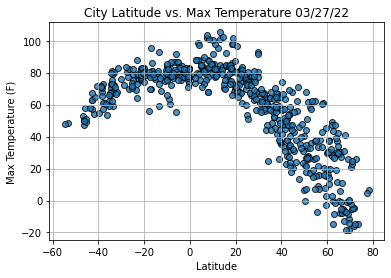

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

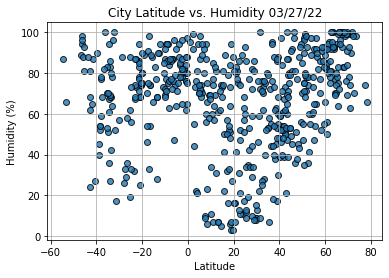

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

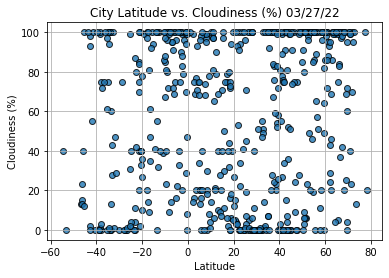

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

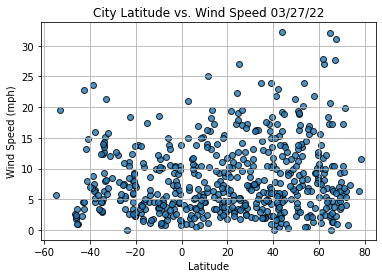

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [38]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [39]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [40]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

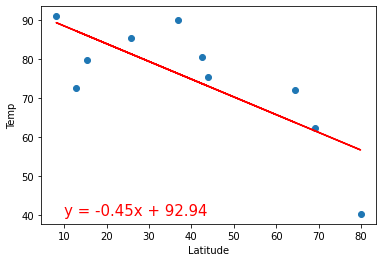

In [41]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [42]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [43]:
#Displaying output
index13 = city_data_df.loc[13]
index13

City                 Puerto Ayora
Country                        EC
Date          2022-03-27 15:58:04
Lat                       -0.7393
Lng                      -90.3518
Max Temp                    82.36
Humidity                       80
Cloudiness                     70
Wind Speed                  10.42
Name: 13, dtype: object

In [44]:
# Displaying values of a row
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
536    False
537    False
538     True
539     True
540     True
Name: Lat, Length: 541, dtype: bool

In [45]:
# Displaying values of a row
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Punta Cardon,VE,2022-03-27 15:58:00,11.6581,-70.2150,82.08,69,21,25.12
3,Saskylakh,RU,2022-03-27 15:58:01,71.9167,114.0833,-4.97,99,100,4.14
4,Chokurdakh,RU,2022-03-27 15:58:01,70.6333,147.9167,-5.24,99,99,5.91
5,Bac Lieu,VN,2022-03-27 15:58:01,9.2850,105.7244,83.68,69,8,5.84
12,Tiksi,RU,2022-03-27 15:58:04,71.6872,128.8694,-15.95,100,70,5.39
...,...,...,...,...,...,...,...,...,...
534,Neftcala,AZ,2022-03-27 16:01:50,39.3742,49.2472,48.25,68,26,13.47
535,Boone,US,2022-03-27 15:57:41,39.0334,-92.3335,37.72,48,99,1.01
538,Sulangan,PH,2022-03-27 16:01:51,11.1373,123.7228,82.00,77,97,13.53
539,Baihar,IN,2022-03-27 16:01:51,22.1000,80.5500,78.87,13,91,3.76


In [46]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

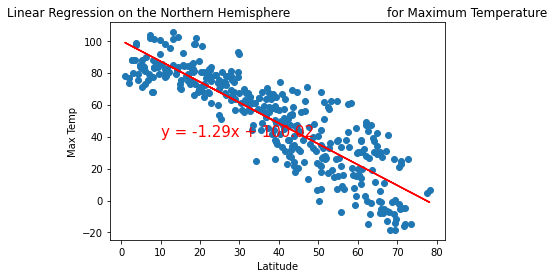

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

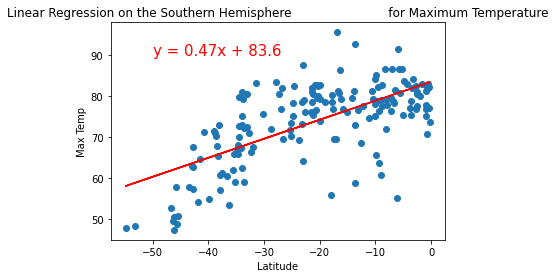

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

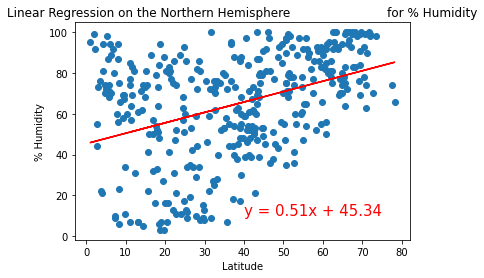

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

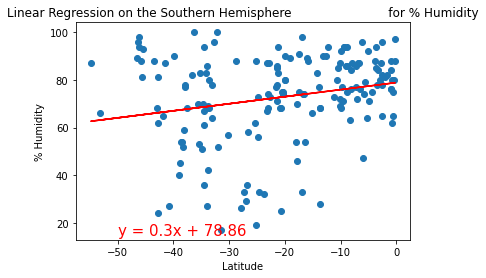

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

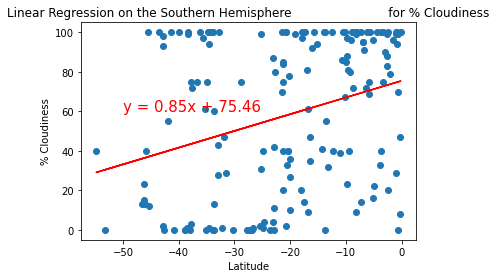

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

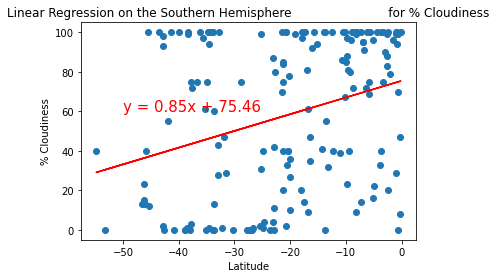

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

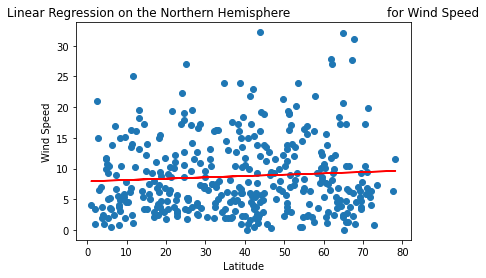

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

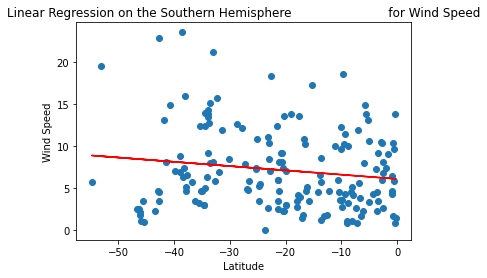

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [55]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")

city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Punta Arenas,CL,2022-03-27 15:57:59,-53.1500,-70.9167,48.31,66,0,19.57
1,1,New Norfolk,AU,2022-03-27 15:58:00,-42.7826,147.0587,62.71,62,98,3.44
2,2,Punta Cardon,VE,2022-03-27 15:58:00,11.6581,-70.2150,82.08,69,21,25.12
3,3,Saskylakh,RU,2022-03-27 15:58:01,71.9167,114.0833,-4.97,99,100,4.14
4,4,Chokurdakh,RU,2022-03-27 15:58:01,70.6333,147.9167,-5.24,99,99,5.91


In [56]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [57]:
# 1. Assign the locations to an array of latitude and longitude pairs.
locations = city_data_df[["Lat", "Lng"]]

# 2. Assign the weights variable to some values.
max_temp = city_data_df["Max Temp"]

# 3. Assign the figure variable to the gmaps.figure() attribute.
fig = gmaps.figure()
temperatures= abs(max_temp)

# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
heatmap_layer = gmaps.heatmap_layer(locations, weights=temperatures)

# 5. Add the heatmap layer.
fig.add_layer(heatmap_layer)

# 6. Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [58]:
# 1. Assign the locations to an array of latitude and longitude pairs.
locations = city_data_df[["Lat", "Lng"]]

# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

# 3. Assign the figure variable to the gmaps.figure() attribute.
fig = gmaps.figure()
temperatures= abs(max_temp)

# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
heatmap_layer = gmaps.heatmap_layer(locations, weights=temperatures)

# 5. Add the heatmap layer.
fig.add_layer(heatmap_layer)

# 6. Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [59]:
# Another Possible solution to display

# 2. Prompt the user to enter minimum and maximum temperature criteria 
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []

for temp in max_temp:
    temps.append(max(temp, 0))
    
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])

# Add the heatmap layer.
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [60]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

In [ ]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

In [ ]:
# Display the cities DF

preferred_cities_df.count()

In [ ]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

In [ ]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

In [ ]:
#Cleaning output

len(hotels["results"])

In [ ]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params = {
        "location": f"{lat},{lng}",
        "radius": 5000,
        "types" : "hotel",
        "key": g_key
    }

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    
    # Grab the first hotel from the results and store the name.
    #hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError): print("Hotel not found... skipping.")

In [ ]:
# Displaying Hotel Data frame
hotel_df.head()

In [ ]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

In [ ]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

In [ ]:
# The text inside the multiline string is HTML code. 
# HTML code is defined by the opening and closing the angular brackets (e.g., <tag> and <tag/>). 

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [ ]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig